Found 18697 images belonging to 2 classes.
Found 6303 images belonging to 2 classes.
Epoch 1/10
293/293 [==============================] - 2666s 9s/step - loss: 0.2633 - accuracy: 0.9644 - val_loss: 0.0682 - val_accuracy: 0.9775
Epoch 2/10
293/293 [==============================] - 2644s 9s/step - loss: 0.0268 - accuracy: 0.9902 - val_loss: 0.0680 - val_accuracy: 0.9770
Epoch 3/10
293/293 [==============================] - 2644s 9s/step - loss: 0.0075 - accuracy: 0.9980 - val_loss: 0.0866 - val_accuracy: 0.9765
Epoch 4/10
293/293 [==============================] - 2645s 9s/step - loss: 0.0021 - accuracy: 0.9997 - val_loss: 0.0947 - val_accuracy: 0.9791
Epoch 5/10
293/293 [==============================] - 2645s 9s/step - loss: 9.7708e-04 - accuracy: 0.9998 - val_loss: 0.1027 - val_accuracy: 0.9787
Epoch 6/10
293/293 [==============================] - 2639s 9s/step - loss: 7.0328e-04 - accuracy: 0.9998 - val_loss: 0.1087 - val_accuracy: 0.9786
Epoch 7/10
293/293 [=======================

<ipython-input-2-cd0c06a24b14>:79: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  _, acc = model.evaluate_generator(test_it, steps=len(test_it), verbose=0)


> 97.937


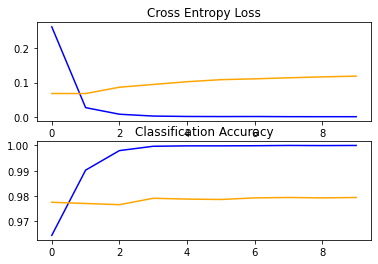

Execution time in minutes: 452.1557439287504


In [2]:
import sys
from matplotlib import pyplot
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Flatten
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.preprocessing.image import ImageDataGenerator

import time

startTime = time.time()
    
    
# define cnn model
def define_model():
    # load model
    model = VGG16(include_top=False, input_shape=(224, 224, 3))
    
    # mark loaded layers as not trainable
    for layer in model.layers:
        layer.trainable = False
    
    # add new classifier layers
    flat1 = Flatten()(model.layers[-1].output)
    class1 = Dense(128, activation='relu', kernel_initializer='he_uniform')(flat1)
    output = Dense(1, activation='sigmoid')(class1)
    
    # define new model
    model = Model(inputs=model.inputs, outputs=output)
    
    # compile model
    opt = SGD(learning_rate=0.001, momentum=0.9)
    model.compile(optimizer=opt, loss='binary_crossentropy', metrics=['accuracy'])
    return model
 
# plot diagnostic learning curves
def summarize_diagnostics(history):
    # plot loss
    pyplot.subplot(211)
    pyplot.title('Cross Entropy Loss')
    pyplot.plot(history.history['loss'], color='blue', label='train')
    pyplot.plot(history.history['val_loss'], color='orange', label='test')
    
    # plot accuracy
    pyplot.subplot(212)
    pyplot.title('Classification Accuracy')
    pyplot.plot(history.history['accuracy'], color='blue', label='train')
    pyplot.plot(history.history['val_accuracy'], color='orange', label='test')
    pyplot.show()
    # save plot to file
    # FIXME produces no image (or not found)
    #filename = sys.argv[0].split('/')[-1]
    #pyplot.savefig(filename + '_plot.png')

# test harness for evaluating a model
def run_test_harness():
    # define model
    model = define_model()
    
    # create data generator
    datagen = ImageDataGenerator(featurewise_center=True)
    
    # specify imagenet mean values for centering
    datagen.mean = [123.68, 116.779, 103.939]
    
    # prepare iterator
    train_it = datagen.flow_from_directory('dataset_dogs_vs_cats/train/',
        class_mode='binary', batch_size=64, target_size=(224, 224))
    test_it = datagen.flow_from_directory('dataset_dogs_vs_cats/test/',
        class_mode='binary', batch_size=64, target_size=(224, 224))
    
    # fit model
    history = model.fit(train_it, steps_per_epoch=len(train_it),
        validation_data=test_it, validation_steps=len(test_it), epochs=10, verbose=1)
    
    # evaluate model
    _, acc = model.evaluate_generator(test_it, steps=len(test_it), verbose=0)
    print('> %.3f' % (acc * 100.0))
    
    # learning curves
    summarize_diagnostics(history)
 
# entry point, run the test harness
run_test_harness()


executionTime = ((time.time() - startTime)/60)
print('Execution time in minutes: ' + str(executionTime))

In [1]:
import sys
from matplotlib import pyplot
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Flatten
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import time

startTime = time.time()

# define cnn model
def define_model():
    # load model
    model = VGG16(include_top=False, input_shape=(224, 224, 3))
    # mark loaded layers as not trainable
    for layer in model.layers:
        layer.trainable = False
    # add new classifier layers
    flat1 = Flatten()(model.layers[-1].output)
    class1 = Dense(128, activation='relu', kernel_initializer='he_uniform')(flat1)
    output = Dense(1, activation='sigmoid')(class1)
    # define new model
    model = Model(inputs=model.inputs, outputs=output)
    # compile model
    opt = SGD(lr=0.001, momentum=0.9)
    model.compile(optimizer=opt, loss='binary_crossentropy', metrics=['accuracy'])
    return model
 
# run the test harness for evaluating a model
def run_test_harness():
# define model
    model = define_model()
    # create data generator
    datagen = ImageDataGenerator(featurewise_center=True)
    # specify imagenet mean values for centering
    datagen.mean = [123.68, 116.779, 103.939]
    # prepare iterator
    train_it = datagen.flow_from_directory('finalize_dogs_vs_cats/',
        class_mode='binary', batch_size=64, target_size=(224, 224))
    # fit model
    model.fit_generator(train_it, steps_per_epoch=len(train_it), epochs=10, verbose=0)
    # save model
    model.save('final_model.h5')
 
# entry point, run the test harness
run_test_harness()


executionTime = ((time.time() - startTime)/60)
print('Execution time in minutes: ' + str(executionTime))

C:\Users\Jared\anaconda3\lib\site-packages\keras\optimizer_v2\gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


Found 25000 images belonging to 2 classes.


<ipython-input-1-eba6323ce7b0>:44: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  model.fit_generator(train_it, steps_per_epoch=len(train_it), epochs=10, verbose=0)


Execution time in minutes: 443.99502888917925
